In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500, n_classes=2, n_features=15,random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

#another model
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#predict prob for test data
prob = model.predict_proba(X_test)

#postive class prob get
probs = prob[:,1]

In [ ]:
prob1 = model1.predict_proba(X_test)
probs1 = prob1[:,1]

In [ ]:
#AUC Score
roc_acc = roc_auc_score(y_test,probs1)
roc_acc

0.9514224369296832

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probs)
fpr1, tpr1, thr1 = roc_curve(y_test,probs1)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_roc_curve(fpr, tpr,fpr1, tpr1):
  plt.plot(fpr,tpr, color='red',label='ROC')
  plt.plot(fpr1,tpr1, color='Orange',label='ROC')
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

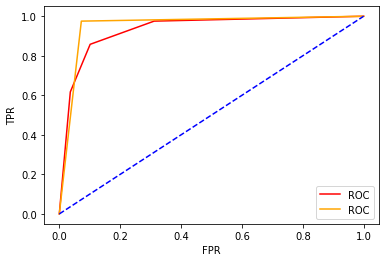

In [ ]:
plot_roc_curve(fpr,tpr,fpr1,tpr1)


In [ ]:
iris = datasets.load_iris()
X = iris.data
y= iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier


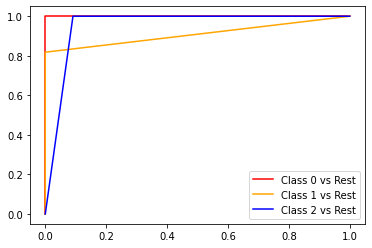

In [ ]:
mcmodel = OneVsRestClassifier(DecisionTreeClassifier())
mcmodel.fit(X_train, y_train)
pred = mcmodel.predict(X_test)
probs = mcmodel.predict_proba(X_test)
#roc curve
fpr = {}
tpr = {}
thresh = {}
n_classes =3
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test,probs[:,i], pos_label=i)

plt.plot(fpr[0],tpr[0], color='red',label='Class 0 vs Rest')
plt.plot(fpr[1],tpr[1], color='Orange',label='Class 1 vs Rest')
plt.plot(fpr[2],tpr[2], color='blue',label='Class 2 vs Rest')

plt.legend()
plt.show()


In [ ]:
#Ensemble Classification
from sklearn.ensemble import BaggingClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
bagg_model = BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=False)
bagg_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=Non

In [ ]:
ytest_pred = bagg_model.predict(X_test)
print(bagg_model.score(X_test,y_test))
print(confusion_matrix(y_test, ytest_pred))

0.9333333333333333
[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
gnb = GaussianNB()
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)


In [ ]:
base_est = [gnb,lr,knn,dtc]
for be in base_est:
  print("Method: ", be)
  bagg_model = BaggingClassifier(base_estimator=be, n_estimators=50)
  bagg_model = bagg_model.fit(X_train, y_train)
  ytest_pred = bagg_model.predict(X_test)
  print(bagg_model.score(X_test,y_test))
  print(confusion_matrix(y_test, ytest_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=4)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
estimators = []
estimators.append(('logistic',lr))
estimators.append(('NB',gnb))
estimators.append(('DT',dtc))
estimators.append(('KNN',knn))
#ensebme model creation
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

In [ ]:
from sklearn.model_selection import KFold 

In [ ]:
#dateset, crossvalication, #model
from numpy import mean
scores = cross_val_score(knn,X,y,scoring='accuracy',cv=kfold, n_jobs=-1)

In [ ]:
print('Accuracy:', (mean(scores)))

Accuracy: 0.9333333333333333


In [ ]:
def model():
  model = KNeighborsClassifier(n_neighbors=5)
  return model

def model_acc(cv):
  model1 = model()
  scores = cross_val_score(model1,X,y,scoring='accuracy', cv=cv,n_jobs=-1)
  return mean(scores), scores.min(), scores.max()


folds = range(3,40)
#min, max, mean value of accuracy at each fold
min,max, means = list(), list(), list()
#check for every k value
for k in folds:
  cv = KFold(n_splits=k, shuffle=True, random_state=1)
  k_mean, k_min, k_max = model_acc(cv)
  print('Fold=%d, accuracy=%.3f (%.3f,%.3f)',(k,k_mean,k_min,k_max))
  min.append(k_min)
  max.append(k_max)
  means.append(k_mean)



In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(n_estimators=500, base_estimator = gnb,learning_rate=1)
ad = adc.fit(X_train,y_train)
y_pred = ad.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
#to choose best parameters for your model
#model = knn

params = {
        'n_neighbors' : [5,25],
        'weights': ['uniform','distance'],
        'algorithm': ['auto','ball_tree','kd_tree','brute'],
               
}
grid_knn = GridSearchCV(estimator=knn,
                       param_grid=params,
                        scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
grid_knn.fit(X,y)
80

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.1s finished


80

In [ ]:
ans = grid_knn.best_estimator_

In [ ]:
grid_knn.best_score_

0.9733333333333334

In [ ]:
ans.predict(y_test)

ValueError: ignored